In [1]:
"""
Purpose: 
    Predict the birth weight with different variables of the parents.
    The steps are the following: 
    1) Importing and analysing the data
    2) Missing values detection, Flagging and Imputation
    3) Feature Engineering 
    4) Correlation Analysis
    5) Linear model with the whole dataset
    6) OLS/lasso/ARD Trials
    7) Comparing the score of different regression models
    
"""


'\nPurpose: \n    Predict the birth weight with different variables of the parents.\n    The steps are the following: \n    1) Importing and analysing the data\n    2) Missing values detection, Flagging and Imputation\n    3) Feature Engineering \n    4) Correlation Analysis\n    5) Linear model with the whole dataset\n    6) OLS/lasso/ARD Trials\n    7) Comparing the score of different regression models\n    \n'

## Importing and Analysing the data

In [2]:
import pandas as pd #data science essentials
import matplotlib.pyplot as plt #essential graphical output
import seaborn as sns  #enhanced graphical output
import statsmodels.formula.api as smf #mathematical essentials
from sklearn.model_selection import train_test_split #training dataframe tools
import numpy as np #regression modeling
from scipy.stats import iqr # IQR for Outlier Detection
from sklearn.linear_model import LinearRegression # Linear Regression

#declaring variable of the file 
file = './birthweight_low.xlsx'
#storing the excel that is going to be the dataframe into a variable
birthweight = pd.read_excel (io = file, 
                            sheet_name = 0,
                            header = 0)

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#removing the columns that won't help us to predict the birthweight 
birthweight = birthweight.drop(columns = ['fmaps', 'omaps'], axis = 0)


#printing the information of each column
print(birthweight.info())
#printing the sum of the missing values


#printing the 15 first rows
birthweight.head(n=15)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    196 non-null    int64  
 1   meduc   193 non-null    float64
 2   monpre  196 non-null    int64  
 3   npvis   193 non-null    float64
 4   fage    196 non-null    int64  
 5   feduc   189 non-null    float64
 6   cigs    196 non-null    int64  
 7   drink   196 non-null    int64  
 8   male    196 non-null    int64  
 9   mwhte   196 non-null    int64  
 10  mblck   196 non-null    int64  
 11  moth    196 non-null    int64  
 12  fwhte   196 non-null    int64  
 13  fblck   196 non-null    int64  
 14  foth    196 non-null    int64  
 15  bwght   196 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 24.6 KB
None


,mage,meduc,monpre,npvis,fage,feduc,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,17,13,0,1,0,0,1,0,0,1956
5,67,11.0,4,8.0,40,8.0,16,14,0,1,0,0,1,0,0,1984
6,54,12.0,2,12.0,46,12.0,17,12,1,0,1,0,0,1,0,2050
7,71,14.0,4,7.0,51,11.0,15,13,0,1,0,0,1,0,0,2068
8,56,12.0,1,9.0,53,14.0,14,9,1,1,0,0,1,0,0,2148
9,58,12.0,2,12.0,61,16.0,13,6,0,0,1,0,0,1,0,2180


In [3]:
#Analysing the composision of each column
birthweight.describe(include = 'number').round(decimals = 2)

,mage,meduc,monpre,npvis,fage,feduc,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
count,196.00,193.00,196.00,193.00,196.00,189.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00
mean,40.15,13.91,2.34,11.60,39.29,13.85,10.93,5.40,0.55,0.27,0.38,0.35,0.35,0.34,0.31,3334.09
std,10.25,2.06,1.36,4.27,8.98,2.63,6.10,3.00,0.50,0.45,0.49,0.48,0.48,0.48,0.46,646.70
min,23.00,8.00,1.00,2.00,23.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,697.00
25%,33.00,12.00,2.00,10.00,34.75,12.00,6.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2916.25
50%,39.00,14.00,2.00,12.00,38.00,14.00,11.00,5.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,3452.00
75%,46.00,16.00,3.00,12.00,43.00,16.00,15.25,7.25,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3759.50
max,71.00,17.00,8.00,35.00,73.00,17.00,25.00,14.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,4933.00


## Missing values detection, Flagging and Imputation

In [4]:
#printing the quantity of missing value per feature
print('*' * 50)
print(f"""Sum of missing values:
{birthweight.isnull().sum()}""")
print('*' * 50)

**************************************************
Sum of missing values:
mage      0
meduc     3
monpre    0
npvis     3
fage      0
feduc     7
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64
**************************************************


In [5]:
#for every col in birthweight df 
for col in birthweight: 
    #analizing if each column has missing value
    if birthweight[col].isnull().sum() > 0:
        #creating a m column
        birthweight['m_' + col] =  birthweight[col].isnull().astype(int)

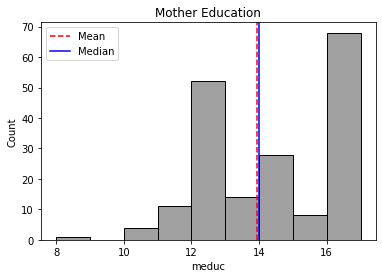

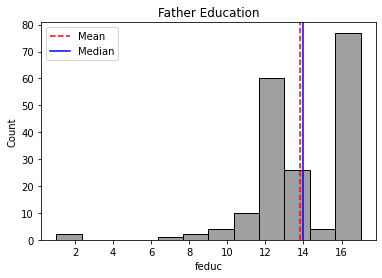

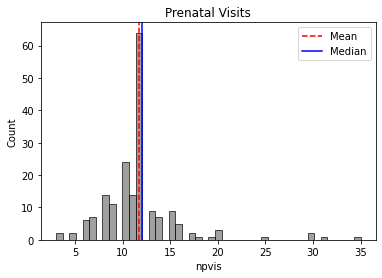

In [6]:
# Dropping NA values
bw_dropped = birthweight.dropna()
titles = ['Mother Education', 'Father Education', 'Prenatal Visits']
cols = ['meduc', 'feduc', 'npvis']
i = 0
for col in cols:
    
    # calculating the mean 
    mean = bw_dropped[col].mean()
    # calculating the median 
    median = bw_dropped[col].median()
    # calculating the histplot 
    sns.histplot(bw_dropped[col],
                 color='grey')

    # Mean Line
    plt.axvline(mean,
                color='r',
                linestyle='--')
    # Median Line
    plt.axvline(median,
                color='b',
                linestyle='-')
    #legend
    plt.legend({'Mean':mean,
                'Median':median})
    plt.title (titles[i])
    i += 1
    #showing the plot
    plt.show()



In [7]:
# Filling all missing values with median
#mother education
fill_value = bw_dropped['meduc'].median()
birthweight['meduc'].fillna (value = fill_value,
                             inplace = True)

#prenatal visits
fill_value = bw_dropped['npvis'].median()
birthweight['npvis'].fillna(value = fill_value,
                             inplace = True)
#father education
fill_value = bw_dropped['feduc'].median()
birthweight['feduc'].fillna(value = fill_value,
                             inplace = True)
birthweight.isnull().sum()

mage       0
meduc      0
monpre     0
npvis      0
fage       0
feduc      0
cigs       0
drink      0
male       0
mwhte      0
mblck      0
moth       0
fwhte      0
fblck      0
foth       0
bwght      0
m_meduc    0
m_npvis    0
m_feduc    0
dtype: int64

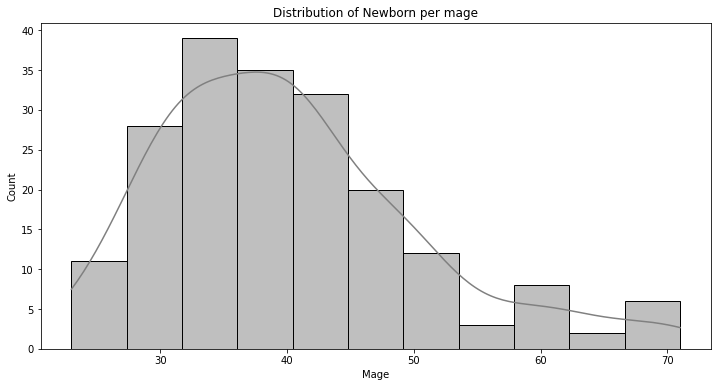

skewness: 0.92
************************************************************************************************************************


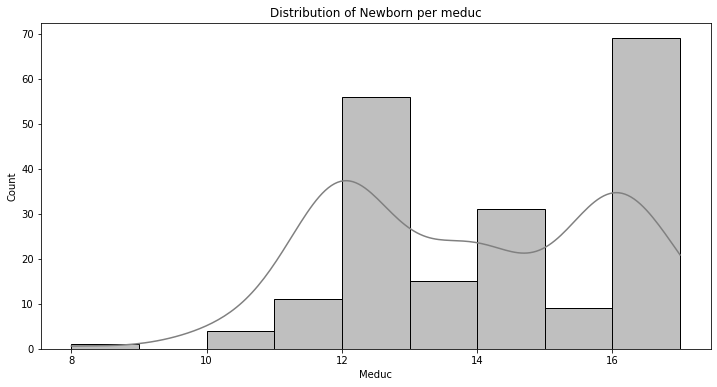

skewness: -0.07
************************************************************************************************************************


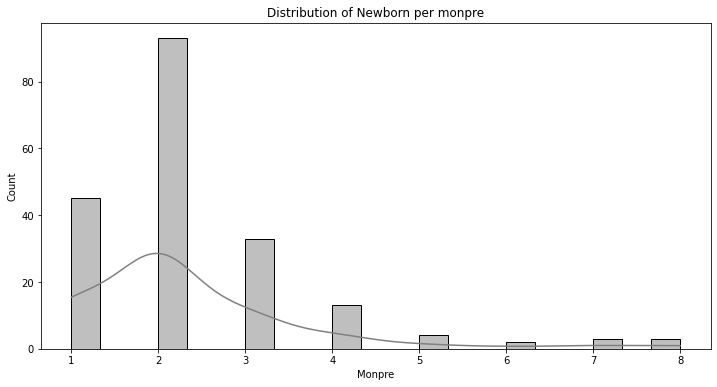

skewness: 2.03
************************************************************************************************************************


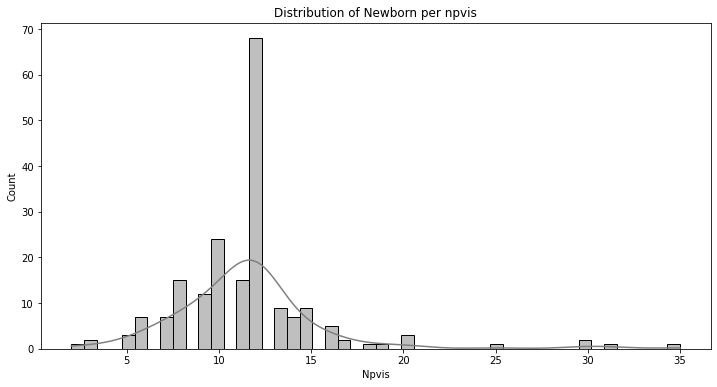

skewness: 2.23
************************************************************************************************************************


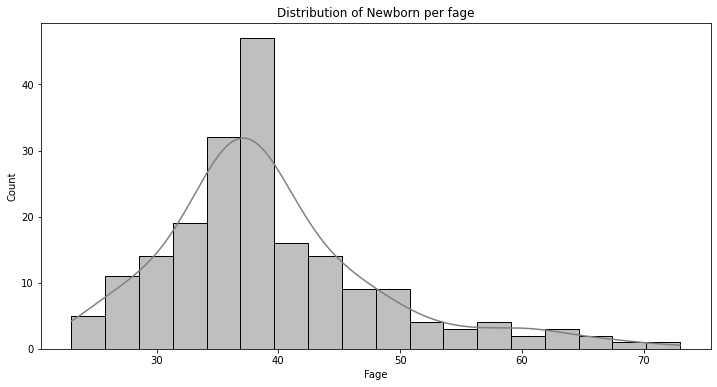

skewness: 1.12
************************************************************************************************************************


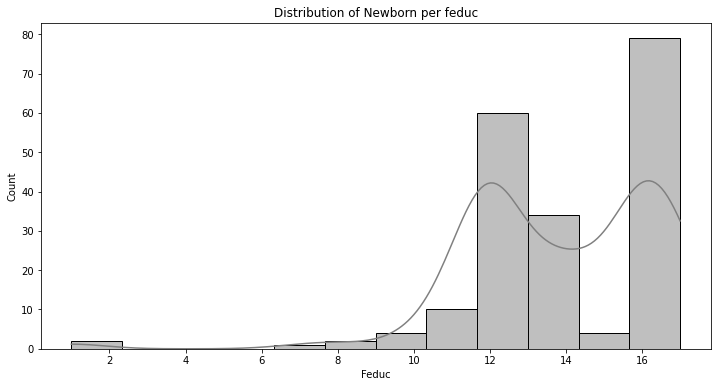

skewness: -1.34
************************************************************************************************************************


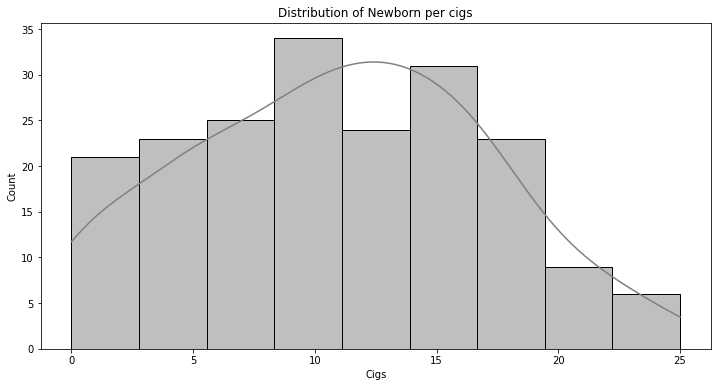

skewness: 0.03
************************************************************************************************************************


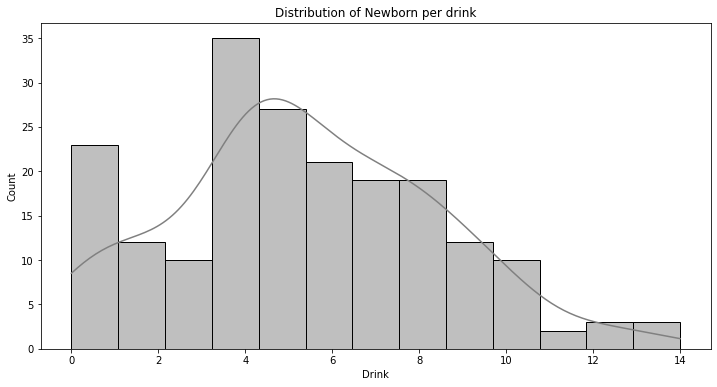

skewness: 0.23
************************************************************************************************************************


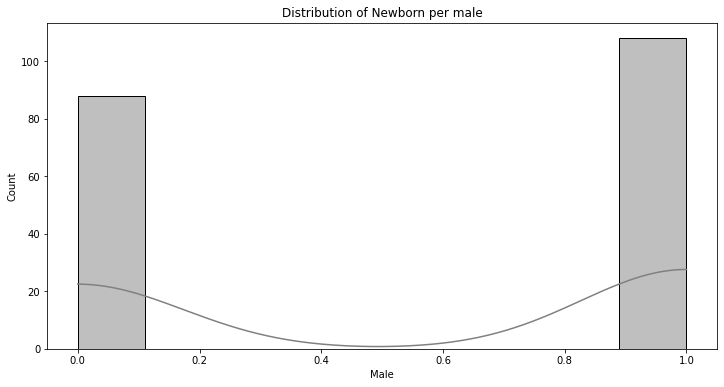

skewness: -0.21
************************************************************************************************************************


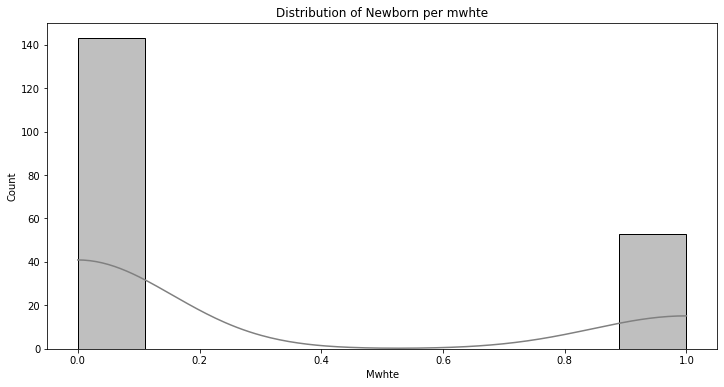

skewness: 1.04
************************************************************************************************************************


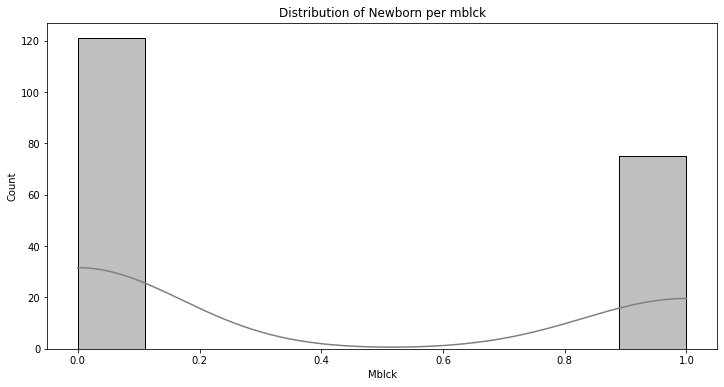

skewness: 0.49
************************************************************************************************************************


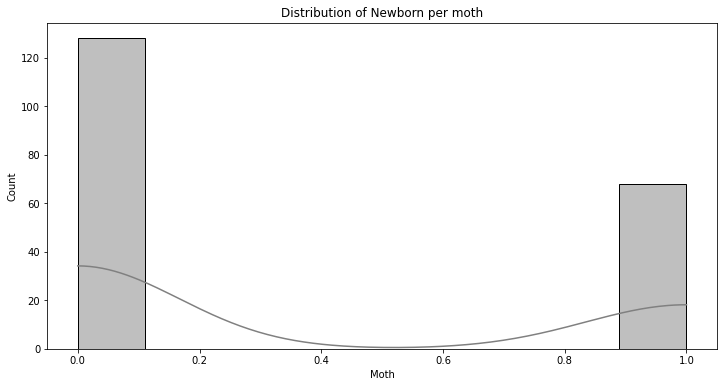

skewness: 0.65
************************************************************************************************************************


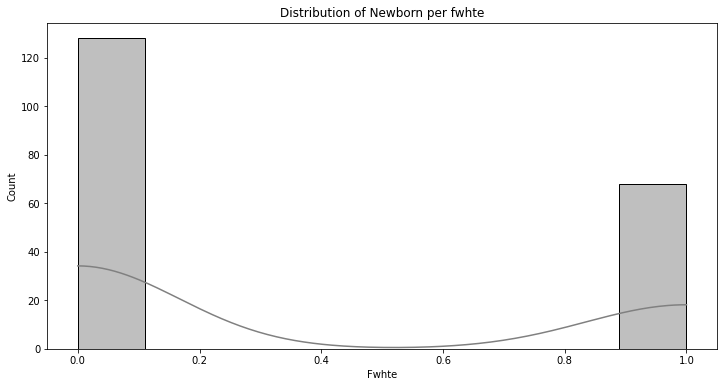

skewness: 0.65
************************************************************************************************************************


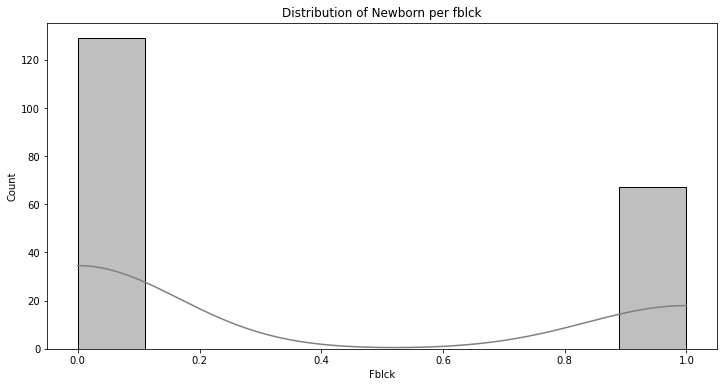

skewness: 0.67
************************************************************************************************************************


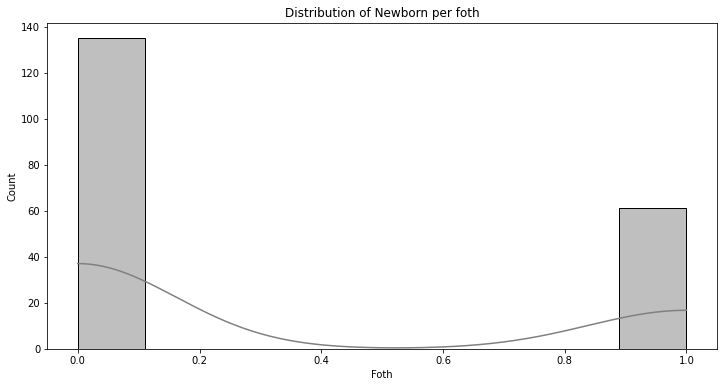

skewness: 0.82
************************************************************************************************************************


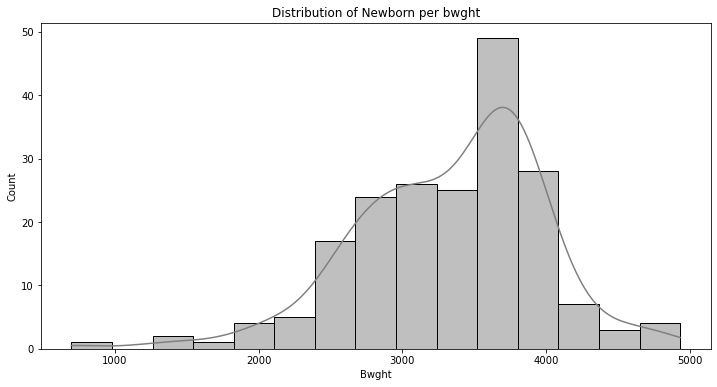

skewness: -0.66
************************************************************************************************************************


In [8]:
#declaring the columns that are not going to be plotted
noplot = ['m_meduc', 'm_npvis', 'm_feduc']
#making a loop of the df columns
for col in birthweight:
    #evaluating that the column is not in notplot list
    if col not in noplot:
        #declaring the size of the plot
        fig, ax = plt.subplots (figsize = (12, 6))
        #performing the histogram plot
        sns.histplot( data = birthweight,
                          x      = col,
                          kde    = True,
                         color = 'grey'
                          )
        #tittle of the plot
        plt.title(label   = "Distribution of Newborn per " + col)
        #X Lable of the plot
        plt.xlabel(xlabel =  col.capitalize()) 
        #Y Lable of the plot
        plt.ylabel(ylabel = "Count")
        plt.show() #showing the plot
        #showing the skewness of all the columns
        print(f"""skewness: {birthweight[col].skew().round(decimals = 2)}""") 
        print('*' * 120)





In [9]:
# Checking different quantiles for outlier detection
bw_quantiles = birthweight.loc[:, :].quantile([0.05,
                                      0.20,
                                      0.40,
                                      0.60,
                                      0.80,
                                      0.95,
                                      1.00])
#displaying df quantiles 
bw_quantiles


,mage,meduc,monpre,npvis,fage,feduc,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,m_meduc,m_npvis,m_feduc
0.05,27.0,11.0,1.0,6.00,26.00,11.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2244.5,0.0,0.0,0.0
0.20,32.0,12.0,1.0,9.00,33.00,12.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2799.0,0.0,0.0,0.0
0.40,37.0,13.0,2.0,11.00,36.00,12.0,9.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3203.0,0.0,0.0,0.0
0.60,41.0,14.0,2.0,12.00,39.00,16.0,13.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3629.0,0.0,0.0,0.0
0.80,48.0,16.0,3.0,13.00,45.00,16.0,16.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3827.0,0.0,0.0,0.0
0.95,61.0,17.0,5.0,17.25,58.25,17.0,21.0,10.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4213.5,0.0,0.0,0.0
1.00,71.0,17.0,8.0,35.00,73.00,17.0,25.0,14.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4933.0,1.0,1.0,1.0


## Feature Engineering

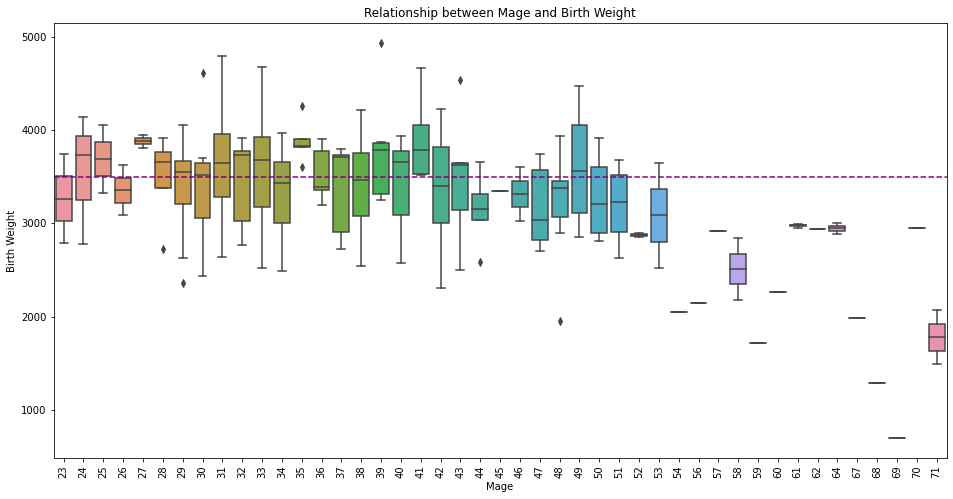

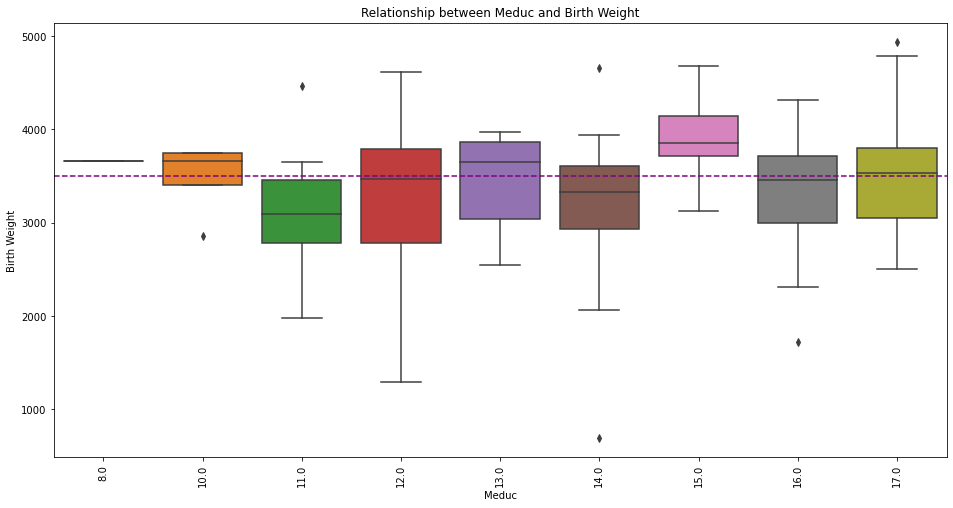

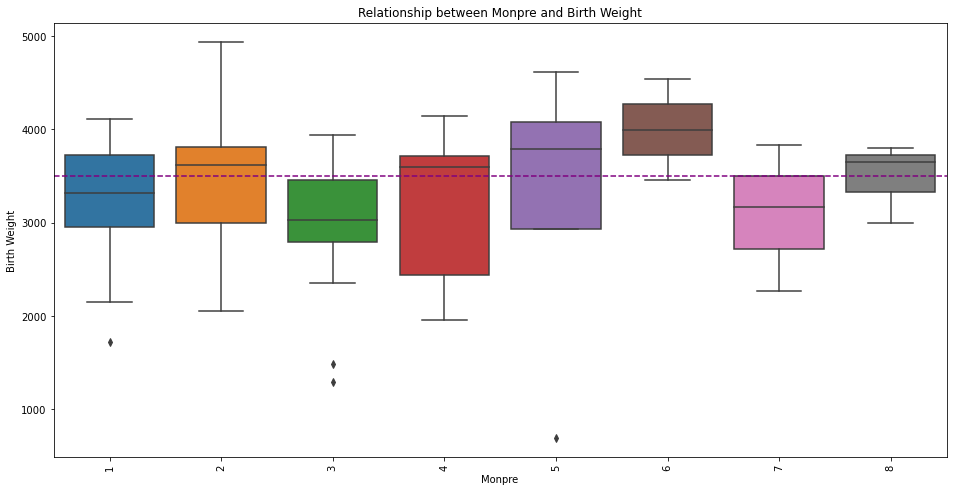

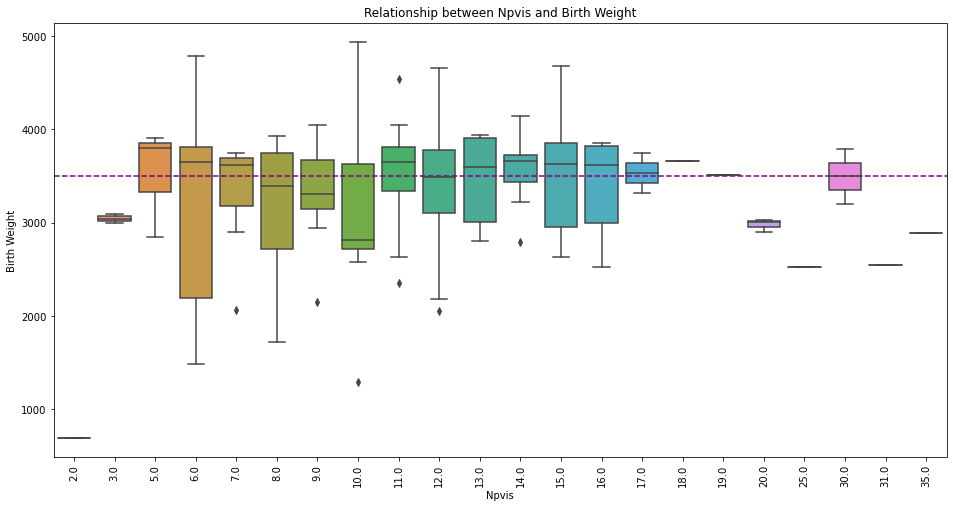

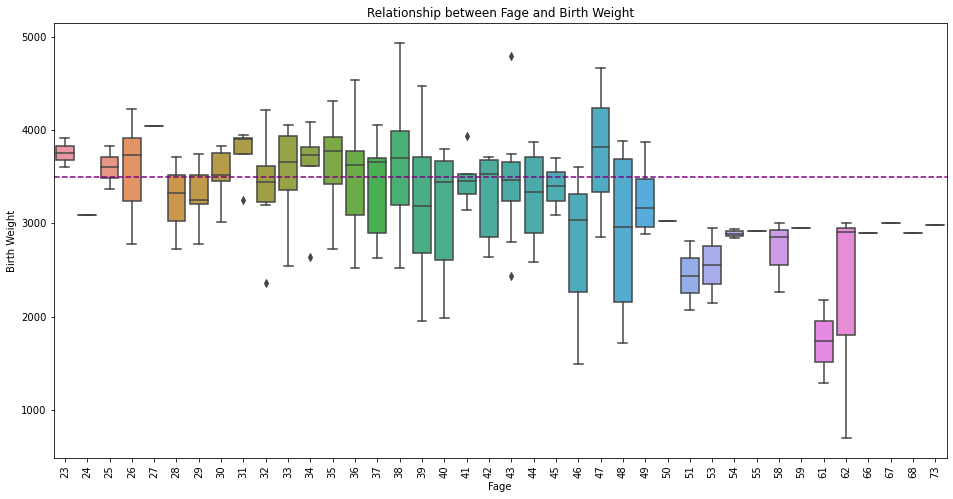

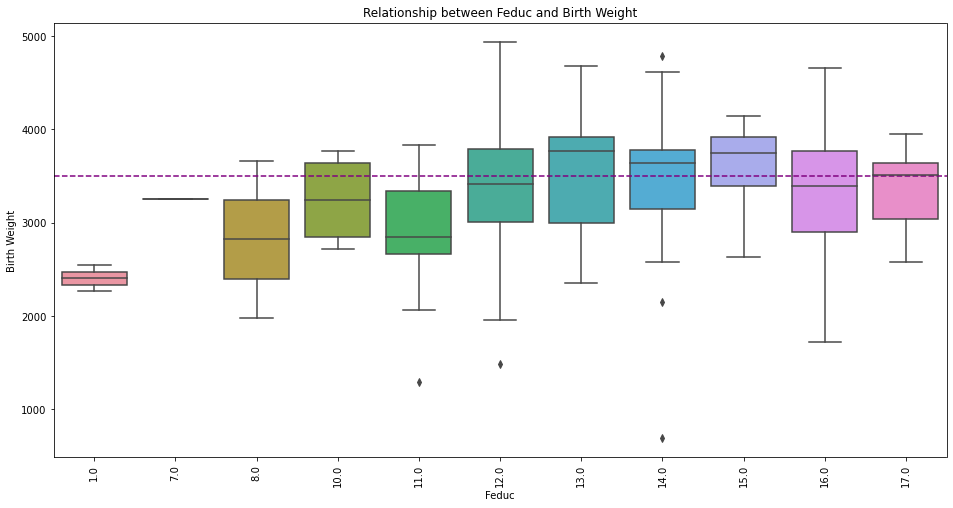

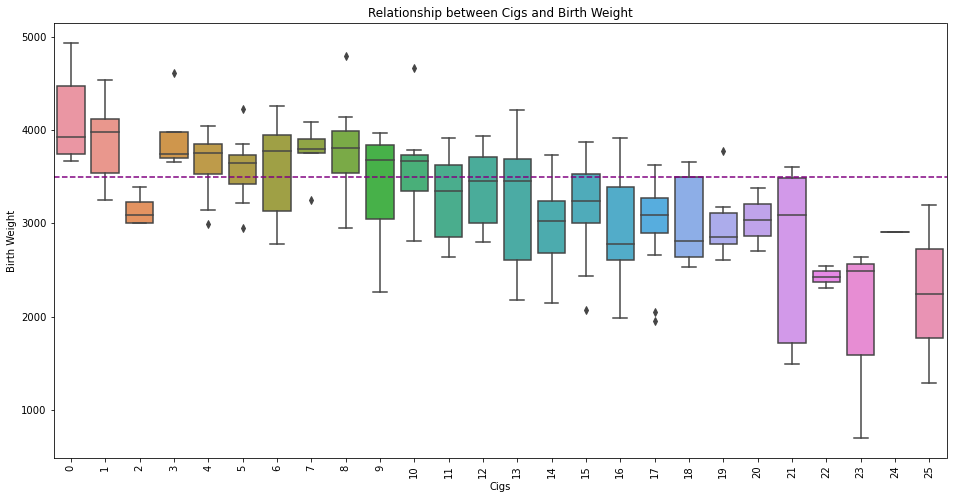

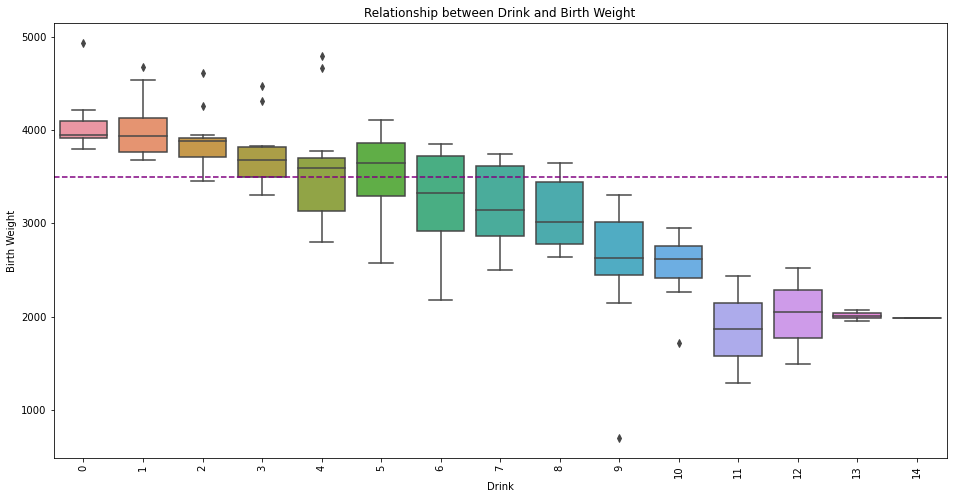

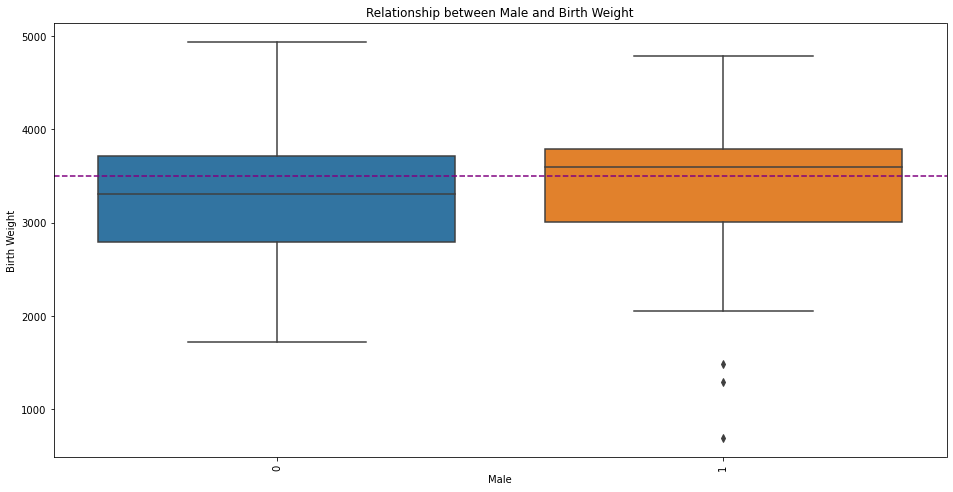

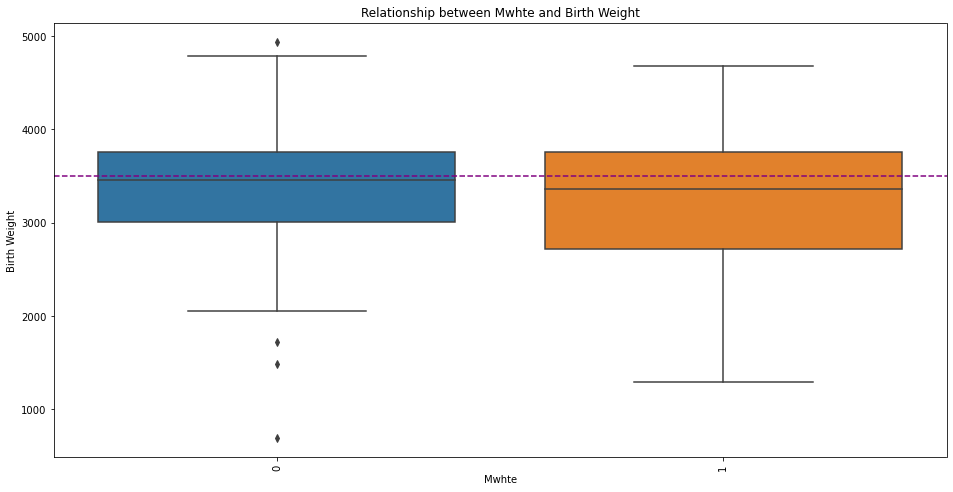

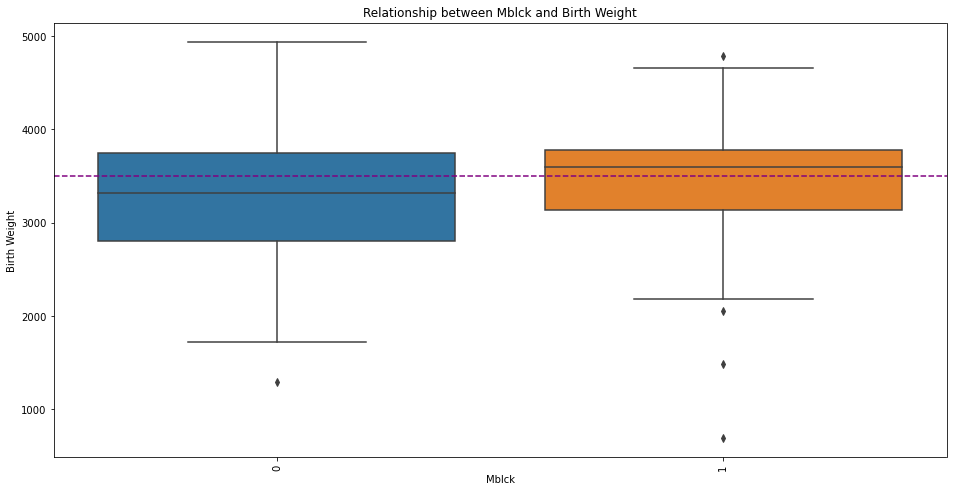

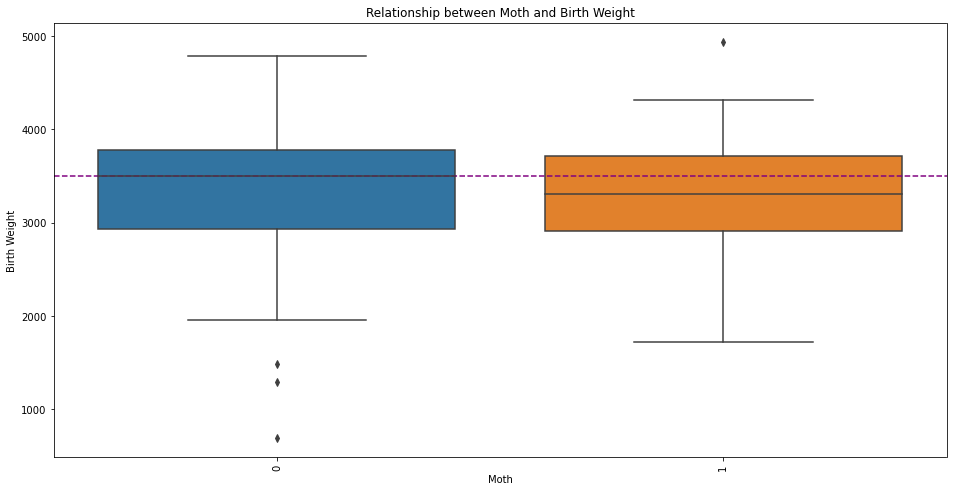

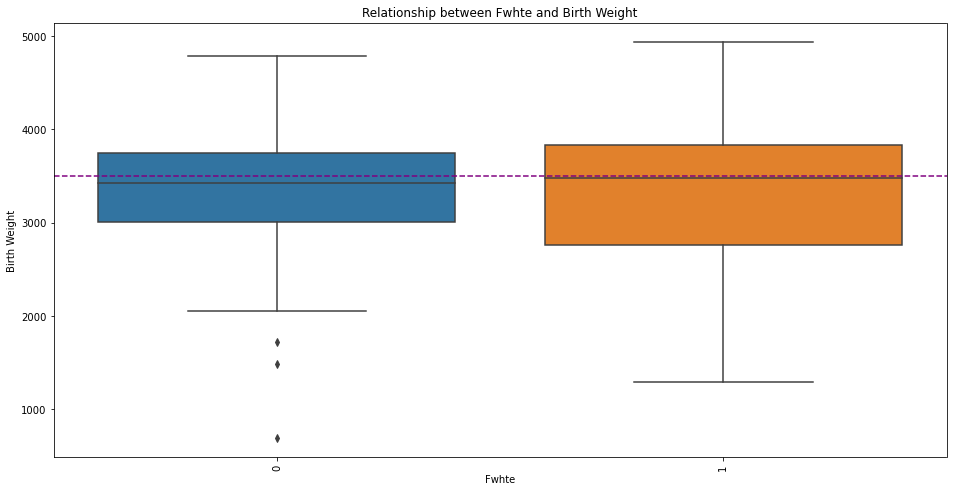

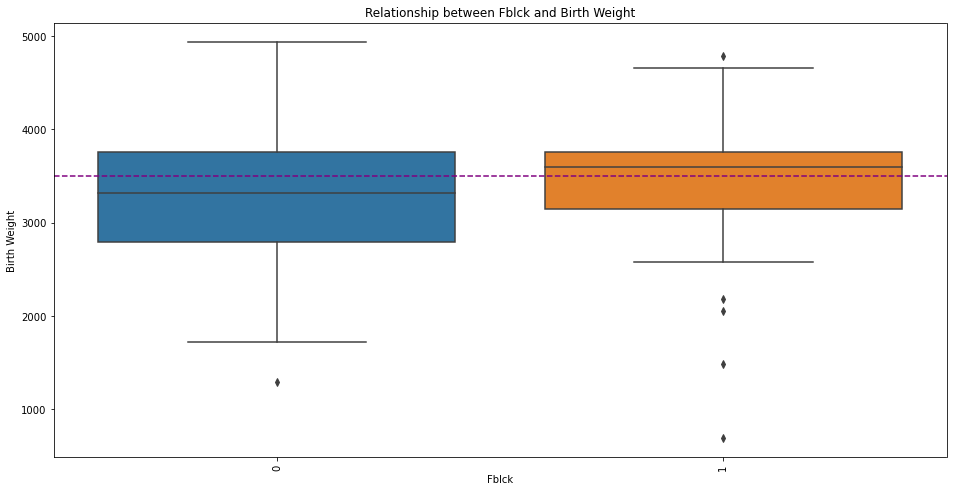

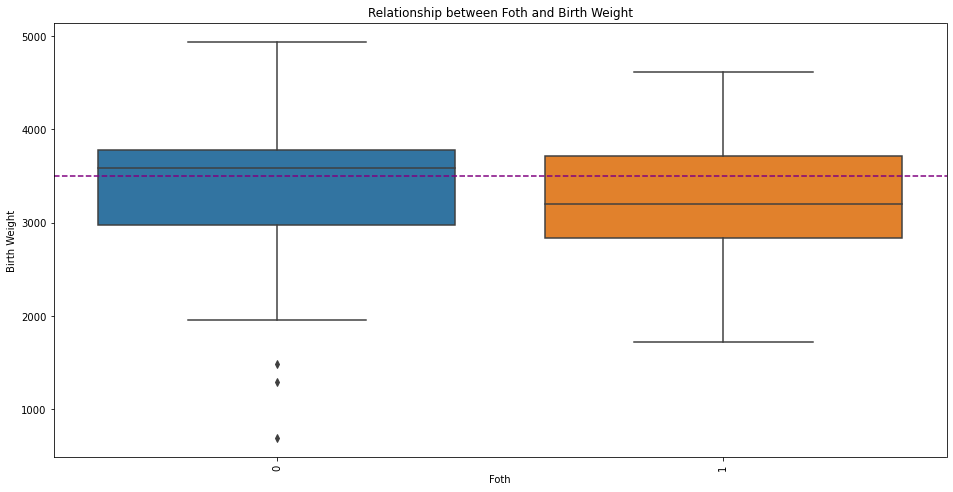

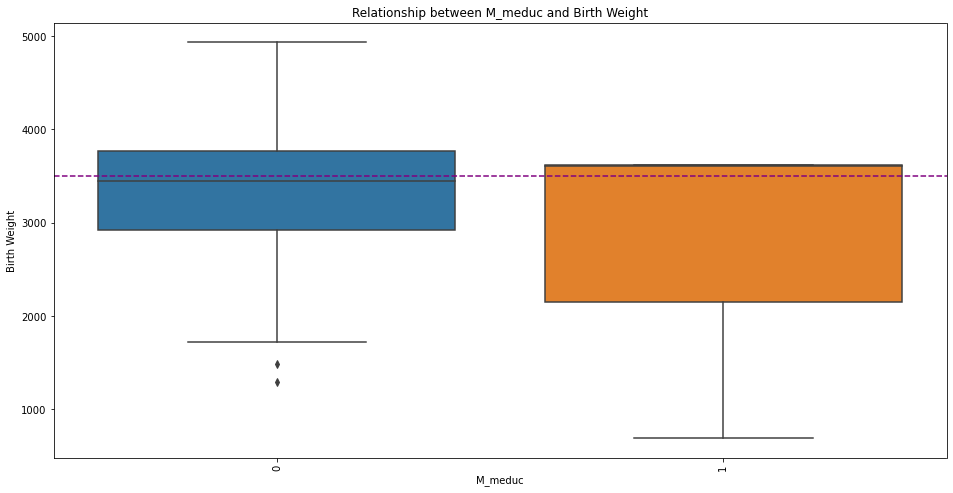

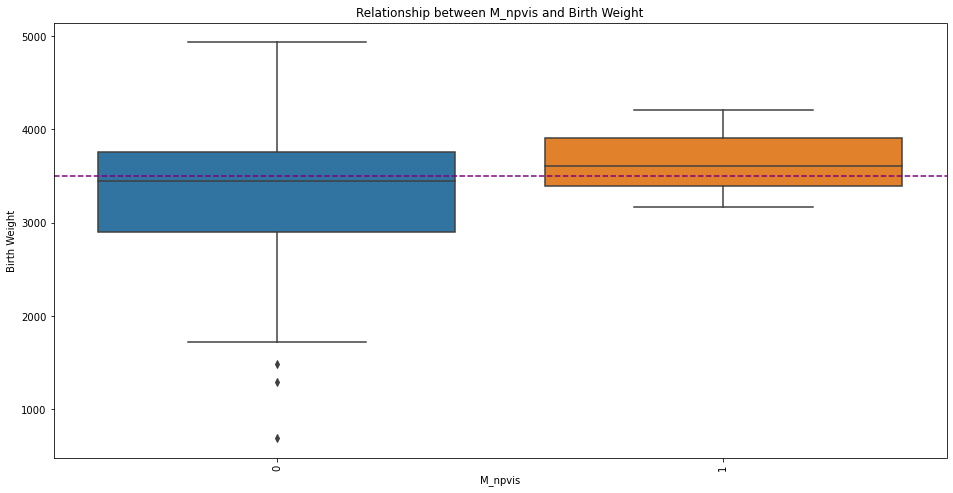

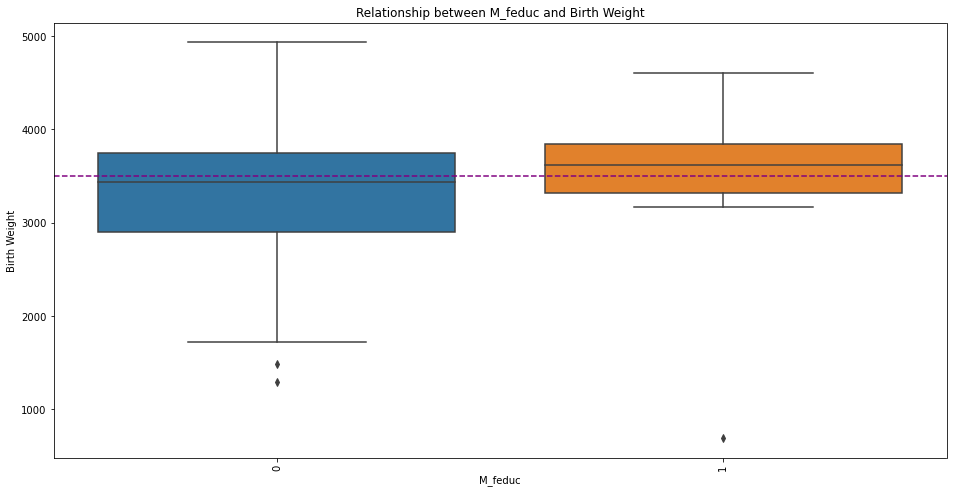

In [10]:
#making a list of the variables that is not going to be displayed
data =['bwght', 'log_bwght']
log = ['npvis'] 
for col in birthweight:
    if  col not in (data):
        fig, ax = plt.subplots(figsize =(16, 8))
    # developing a boxplot
        sns_boxplot = sns.boxplot(x     = col,
                    y     = 'bwght',
                    data  = birthweight)
        
        plt.axhline(y = 3500, color = "purple", linestyle = '--')
        # titles and labels
        plt.title(label   = 'Relationship between ' + col.capitalize() + ' and Birth Weight')
        plt.xlabel(xlabel = col.capitalize())
        plt.ylabel(ylabel = 'Birth Weight')
        plt.setp(sns_boxplot.get_xticklabels(), rotation=90)
        plt.show()
        

for col in log:
    if birthweight[col].min() == 0 and birthweight[col].value_counts().count() == 2:
        break
    elif birthweight[col].min() == 0:
        birthweight['log_' + col] = np.log(birthweight[col] + 0.99)
    elif birthweight[col].min() > 0:
        birthweight['log_' + col] = np.log(birthweight[col])
    else:
        print('there is an error')
        
birthweight['log_' + 'bwght'] = np.log(birthweight['bwght'])   


In [11]:
birthweight['cigsadddrink'] = birthweight['drink'] +  birthweight['cigs']
# making a iter row function to create distinct help columns
for row, col in birthweight.iterrows():
    #creating a range of mother age
    if birthweight.loc[row, 'mage'] < 31:
        birthweight.loc[row, 'h2_mage'] = 'first'

    elif birthweight.loc[row, 'mage'] < 41:
        birthweight.loc[row, 'h2_mage'] = 'second'
    elif birthweight.loc[row, 'mage'] < 52:
        birthweight.loc[row, 'h2_mage'] = 'third'
    elif birthweight.loc[row, 'mage'] > 51:
        birthweight.loc[row, 'h2_mage'] = 'fourth'
    else:
         print("error1")
    #creating a range of cigarrettes
    if birthweight.loc[row, 'cigs'] <= 1:
        birthweight.loc[row, 'h2_cig'] = 'first'
    elif birthweight.loc[row, 'cigs'] < 21:
        birthweight.loc[row, 'h2_cig'] = 'second'
    elif birthweight.loc[row, 'cigs'] >= 21:
        birthweight.loc[row, 'h2_cig'] = 'third'
    else:
        print("error2")
    #creating a range of drinks  
    if birthweight.loc[row, 'drink'] < 9:
        birthweight.loc[row, 'h2_drink'] = 'first'
    elif birthweight.loc[row, 'drink'] < 11:
        birthweight.loc[row, 'h2_drink'] = 'second'
    elif birthweight.loc[row, 'drink'] > 10:
        birthweight.loc[row, 'h2_drink'] = 'third'
    else:
        print("error4")
     #creating a range of father education    
    if birthweight.loc[row, 'feduc'] < 9:
        birthweight.loc[row, 'h2_feduc'] = 'first'
    elif birthweight.loc[row, 'feduc'] < 12:
        birthweight.loc[row, 'h2_feduc'] = 'second'
    elif birthweight.loc[row, 'feduc'] > 11:
        birthweight.loc[row, 'h2_feduc'] = 'third'
    else:
        print("error5")
    #creating a range of mother education     
    if birthweight.loc[row, 'meduc'] < 15:
        birthweight.loc[row, 'h2_meduc'] = 0
    elif birthweight.loc[row, 'meduc'] >= 15:
        birthweight.loc[row, 'h2_meduc'] = 1
    else:
        print("error5")
    #creating a range of cigarrettes plus drinks     
    if birthweight.loc[row, 'cigsadddrink'] < 18:
        birthweight.loc[row, 'h2_cigsadddrink'] = 'first'
    elif birthweight.loc[row, 'cigsadddrink'] > 17:
        birthweight.loc[row, 'h2_cigsadddrink'] = 'second'
    else:
        print("error6")    
#obtaining the dummy variables     
temp_birthweight = pd.get_dummies(columns = ['h2_cig', 'h2_mage','h2_drink', 'h2_feduc','h2_cigsadddrink'], data = birthweight ) 
birthweight = temp_birthweight

#different trials 

#birthweight['mageplowweight'] =  birthweight['mage']  * birthweight['low_weight']
#birthweight['cigsplowweight'] =  birthweight['cigs']  * birthweight['low_weight']
#birthweight['drinksplowweight'] =  birthweight['drink']  * birthweight['low_weight']
#birthweight['drinksaddcigplowweight'] = (birthweight['drink'] +  birthweight['cigs'] )* birthweight['low_weight']
#birthweight['log_magesqr'] =  birthweight['log_mage']  * birthweight['log_mage']  
#birthweight['magesqr'] = birthweight['mage'] *  birthweight['mage']
#birthweight['fagesqr'] = birthweight['fage'] *  birthweight['fage']
#birthweight['magesqraddfagesqr'] = birthweight['fagesqr'] + birthweight['magesqr'] 
#birthweight['monpresqr'] = birthweight['monpre'] *  birthweight['monpre']
#birthweight['monpre:npvis'] = birthweight['monpre'] *  birthweight['npvis']
#birthweight['drink:mage'] = birthweight['drink'] *  birthweight['mage']
#birthweight['mblck:mage'] = birthweight['mage'] *  birthweight['mblck']
#birthweight['cigs:mage'] = birthweight['mage'] *  birthweight['cigs']
#birthweight['drinksaddcigs']= birthweight['drink'] *  birthweight['cigs']
#birthweight['cigsadddrinkspermage'] = (birthweight['drink'] +  birthweight['cigs']) * birthweight['mage']
#birthweight['cigssqr'] = birthweight['cigs'] * birthweight['cigs']
#birthweight['drinksqr'] = birthweight['drink'] * birthweight['drink']
#birthweight['mageaddfage'] = birthweight['mage'] * birthweight['fage']
#birthweight['cig:mwhte'] = birthweight['mwhte'] * birthweight['cigs']
#birthweight['npvissqr'] = birthweight['npvis'] * birthweight['npvis']
#birthweight['meducadddfedc'] = birthweight['feduc'] + birthweight['meduc']
#conditions  = [ (birthweight['mblck'] > 0) & (birthweight['fblck'] > 0), birthweight['mblck'] < 1  ]
#choices     = [ 1, 0 ]
#birthweight["parentsblack"] = np.select(conditions, choices, default=0)


## Correlation among the independent features versus birthweight

In [12]:
# creating a (Pearson) correlation matrix
df_corr = birthweight.corr(method = 'pearson').round(2)


# printing (Pearson) correlations with SalePrice
print(df_corr.loc['bwght'].sort_values(ascending = False))

bwght                     1.00
log_bwght                 0.97
h2_cigsadddrink_first     0.65
h2_drink_first            0.61
h2_cig_first              0.32
h2_mage_second            0.22
h2_feduc_third            0.22
log_npvis                 0.16
h2_meduc                  0.14
mblck                     0.13
feduc                     0.13
fblck                     0.12
male                      0.11
meduc                     0.09
h2_mage_first             0.09
npvis                     0.06
m_npvis                   0.06
h2_mage_third             0.04
h2_cig_second             0.01
m_feduc                  -0.00
moth                     -0.02
fwhte                    -0.04
monpre                   -0.05
foth                     -0.08
mwhte                    -0.11
m_meduc                  -0.13
h2_feduc_first           -0.15
h2_feduc_second          -0.16
h2_cig_third             -0.38
fage                     -0.40
h2_drink_third           -0.43
h2_drink_second          -0.43
mage    

In [13]:
# making a copy of birthweight
birthweight_explanatory = birthweight.copy()
# dropping bwght and log_bwght from the explanatory variable set
birthweight_explanatory = birthweight_explanatory.drop(['bwght',
                                                'log_bwght'], axis = 1)

# formatting each explanatory variable for statsmodels
for val in birthweight_explanatory:
    print(f"{val} +")

mage +
meduc +
monpre +
npvis +
fage +
feduc +
cigs +
drink +
male +
mwhte +
mblck +
moth +
fwhte +
fblck +
foth +
m_meduc +
m_npvis +
m_feduc +
log_npvis +
cigsadddrink +
h2_meduc +
h2_cig_first +
h2_cig_second +
h2_cig_third +
h2_mage_first +
h2_mage_fourth +
h2_mage_second +
h2_mage_third +
h2_drink_first +
h2_drink_second +
h2_drink_third +
h2_feduc_first +
h2_feduc_second +
h2_feduc_third +
h2_cigsadddrink_first +
h2_cigsadddrink_second +


## First Linear model with whole dataset

#### I'am removing the columns h2_mage_first and h_meduc because are generating a high p_value

In [14]:
# building a full model

# blueprinting a model type
lm_full = smf.ols(formula = """bwght ~                                            
                                        h2_cig_first +
                                        drink +
                                        h2_cig_third +
                                        h2_mage_fourth +
                                        h2_drink_first +
                                        h2_feduc_third +
                                        h2_cigsadddrink_first 
                                        """,
                               data = birthweight)


# telling Python to run the data through the blueprint
results_full = lm_full.fit()
# printing the results
results_full.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  bwght   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     76.62
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           1.11e-51
Time:                        14:11:38   Log-Likelihood:                -1413.9
No. Observations:                 196   AIC:                             2844.
Df Residuals:                     188   BIC:                             2870.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              3269.6651    173.757     18.817      0.000    2926.902    3612.428
h2_cig_first            265.5671     89.382      2.971      0.003      89.246     441.888
drink                   -81.2780     12.283     -6.617      0.000    -105.509     -57.047
h2_cig_third           -402.6989    102.648     -3.923      0.000    -605.189    -200.209
h2_mage_fourth         -411.3979     84.155     -4.889      0.000    -577.408    -245.388
h2_drink_first          197.7506     94.797      2.086      0.038      10.748     384.753
h2_feduc_third          205.1335     84.867      2.417      0.017      37.719     372.548
h2_cigsadddrink_first   351.0281     61.751      5.685      0.000     229.214     472.843
==============================================================================
Omnibus:                        5.688   Durbin-Watson:                   1.355
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                8.616
Skew:                          -0.014   Prob(JB):                       0.0135
Kurtosis:                       4.027   Cond. No.                         52.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## OLS/Lasso/ARD Trials

In [15]:
#defining the logarithmic target
log_birthweight_target = birthweight.loc[:,'log_bwght']   
#defining the normal target
normal_birthweight_target = birthweight.loc[:,'bwght']
#defining the whole dataset removing certaing columns 
birthweight_data = birthweight.drop(['bwght',
                                    'log_bwght'],
                               axis = 1) 

#making the split value of the whole dataset
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            birthweight_data,     # x-variables
            normal_birthweight_target,   # y-variable
            test_size = 0.25,
            random_state = 219)



In [16]:
import sklearn.linear_model  # linear models
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha = 1.0, normalize = True) # default magitud

# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_FULL)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_FULL, y_train_FULL).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_FULL, y_test_FULL).round(4))

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_FULL, y_test_FULL).round(4)   # using R-square
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_test_gap).round(4))


Lasso Training Score : 0.7769
Lasso Testing Score  : 0.6408
Lasso Train-Test Gap : 0.1361


In [17]:
# zipping each feature name to its coefficient
lasso_model_values = zip(birthweight_data.columns, lasso_fit.coef_.round(decimals = 2))

# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]

# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    
# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 3412.32)
('mage', -4.65)
('meduc', 9.93)
('monpre', 15.15)
('npvis', -0.0)
('fage', -0.0)
('feduc', 2.83)
('cigs', -0.0)
('drink', -43.49)
('male', 33.15)
('mwhte', 31.44)
('mblck', 0.0)
('moth', -25.92)
('fwhte', 0.0)
('fblck', -0.0)
('foth', -0.0)
('m_meduc', -230.33)
('m_npvis', 391.2)
('m_feduc', 0.0)
('log_npvis', 78.22)
('cigsadddrink', -26.6)
('h2_meduc', 47.89)
('h2_cig_first', 0.0)
('h2_cig_second', 0.0)
('h2_cig_third', -146.64)
('h2_mage_first', -0.0)
('h2_mage_fourth', -379.33)
('h2_mage_second', 0.0)
('h2_mage_third', 2.45)
('h2_drink_first', 192.82)
('h2_drink_second', -0.0)
('h2_drink_third', -38.35)
('h2_feduc_first', -0.0)
('h2_feduc_second', -0.0)
('h2_feduc_third', 165.08)
('h2_cigsadddrink_first', 182.73)
('h2_cigsadddrink_second', -0.0)


In [18]:
#declaring the features for future work
coef = ['h2_cig_first',
'drink',
'h2_cig_third',
'h2_mage_first',
'h2_mage_fourth',
'h2_drink_first',
'h2_feduc_third',
'h2_meduc',
'h2_cigsadddrink_first']

### Lasso Model

In [19]:
#declaring the OLS dataframe with the previous features declared
ols_data = birthweight_data.loc[:, coef]

# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            normal_birthweight_target,   # y-variable
            test_size = 0.25,
            random_state = 219)

# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha = 1.0, normalize = True) # default magitud

# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_OLS, y_train_OLS)

# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_OLS)

# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_OLS, y_train_OLS).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_OLS, y_test_OLS).round(4))


# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_OLS, y_train_OLS).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_OLS, y_test_OLS).round(4)   # using R-square
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_test_gap).round(4))


Lasso Training Score : 0.7446
Lasso Testing Score  : 0.7126
Lasso Train-Test Gap : 0.032


In [20]:


# zipping each feature name to its coefficient
lasso_model_values = zip(ols_data.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 3191.27)
('h2_cig_first', 170.03)
('drink', -68.63)
('h2_cig_third', -377.25)
('h2_mage_first', 6.46)
('h2_mage_fourth', -469.45)
('h2_drink_first', 240.09)
('h2_feduc_third', 165.27)
('h2_meduc', 66.02)
('h2_cigsadddrink_first', 377.88)


### OLS Model

In [21]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))  # using R-square
print('OLS Testing Score  :',  lr.score(x_test_OLS, y_test_OLS).round(4)) # using R-square

lr_train_score =  lr.score(x_train_OLS, y_train_OLS)
lr_test_score = lr.score(x_test_OLS, y_test_OLS)

# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.7462
OLS Testing Score  : 0.7092
OLS Train-Test Gap : 0.037


In [22]:
# zipping each feature name to its coefficient
lr_model_values = zip(ols_data[coef].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 3136.61)
('h2_cig_first', 201.97)
('drink', -67.91)
('h2_cig_third', -409.56)
('h2_mage_first', 37.33)
('h2_mage_fourth', -476.43)
('h2_drink_first', 256.67)
('h2_feduc_third', 187.66)
('h2_meduc', 87.55)
('h2_cigsadddrink_first', 384.3)


### ARD Model

In [23]:
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression()


# FITTING the training data
ard_fit = ard_model.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_OLS)
#ard_pred = ard_fit.fit(x_test_FULL)
# saving scoring data for future use
ard_train_score =  ard_model.score(x_train_OLS, y_train_OLS)
ard_test_score  = ard_model.score(x_test_OLS, y_test_OLS)

print('Training Score:',  ard_train_score)
print('Testing Score :',  ard_test_score)

# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.7441377117430091
Testing Score : 0.7103354618287956
ARD Train-Test Gap : 0.0338


In [24]:
# zipping each feature name to its coefficient
ard_model_values = zip(ols_data.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 3242.93)
('h2_cig_first', 152.0264)
('drink', -72.20311)
('h2_cig_third', -382.76736)
('h2_mage_first', 0.00067)
('h2_mage_fourth', -493.66863)
('h2_drink_first', 215.03669)
('h2_feduc_third', 156.74482)
('h2_meduc', 51.93556)
('h2_cigsadddrink_first', 391.48239)


### KNN Regression

In [25]:
coef = ['h2_cig_first',
'drink',
'h2_cig_third',
'h2_mage_first',
'h2_mage_fourth',
'h2_drink_first',
'h2_feduc_third',
'h2_meduc',
'h2_cigsadddrink_first']

In [26]:
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler
# INSTANTIATING a StandardScaler() object
#declaring the OLS dataframe with the previous features declared
birthweight_data = birthweight.drop(['bwght',
                                    'log_bwght'], axis =1)
normal_birthweight_target = birthweight.loc[:,'bwght']
ols_data = birthweight_data.loc[:, coef]



scaler = StandardScaler()

# FITTING the scaler with ols_data
scaler.fit(ols_data)

#y variable is already standarized
# TRANSFORMING our data after fit
x_scaled = scaler.transform(ols_data)

# converting scaled data into a DataFrame
x_scaled_df = pd.DataFrame(x_scaled)

# checking the results
x_scaled_df.describe().round(2)



,0,1,2,3,4,5,6,7,8
count,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00
mean,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.31,-1.80,-0.27,-0.45,-0.36,-2.35,-3.05,-0.81,-1.17
25%,-0.31,-0.47,-0.27,-0.45,-0.36,0.43,0.33,-0.81,-1.17
50%,-0.31,-0.13,-0.27,-0.45,-0.36,0.43,0.33,-0.81,0.86
75%,-0.31,0.62,-0.27,-0.45,-0.36,0.43,0.33,1.23,0.86
max,3.24,2.87,3.75,2.22,2.74,0.43,0.33,1.23,0.86


In [27]:
x_train, x_test, y_train, y_test = train_test_split(
            x_scaled_df,
            normal_birthweight_target,
            test_size = 0.25,
            random_state = 219)

# INSTANTIATING a KNN model object
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 10)


# FITTING to the training data
knn_fit = knn_reg.fit(x_train, y_train)


# PREDICTING on new data
knn_reg_pred = knn_fit.predict(x_test)


# SCORING the results
print('KNN Training Score:', knn_reg.score(x_train, y_train).round(4))
print('KNN Testing Score :',  knn_reg.score(x_test, y_test).round(4))


# saving scoring data for future use
knn_reg_score_train = knn_reg.score(x_train, y_train).round(4)
knn_reg_score_test  = knn_reg.score(x_test, y_test).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_reg_score_train - knn_reg_score_test).round(4))
knn_reg_test_gap = abs(knn_reg_score_train - knn_reg_score_test).round(4)

KNN Training Score: 0.7035
KNN Testing Score : 0.5859
KNN Train-Test Gap: 0.1176


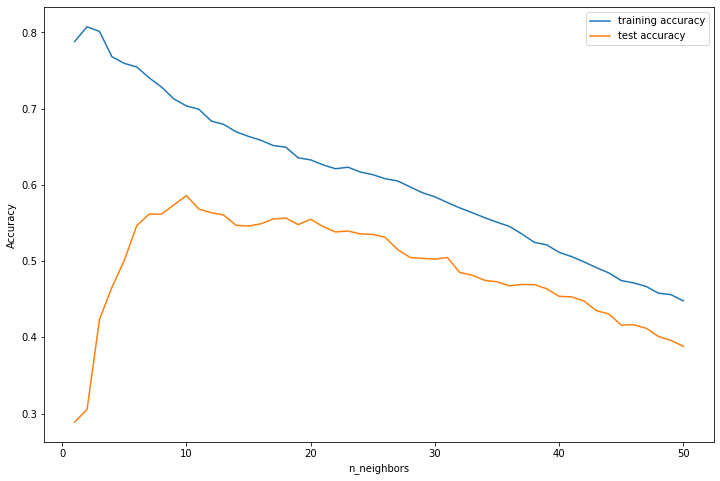

In [28]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy     = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 51)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(x_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(x_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(x_test, y_test))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [29]:
# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

The optimal number of neighbors is 10


## Comparing the score of different regression models

In [30]:
# comparing results

print(f"""
Model                          Train Score      Test Score      GAP Score
-----                          -----------      ----------      ----------
OLS                            {round(lr_train_score,3)}            {round(lr_test_score,3)}          {round(lr_test_gap,3)}
Lasso  (Final Model)           {round(lasso_train_score,3)}            {round(lasso_test_score,3)}          {round(lasso_test_gap,3)}
ARD                            {round(ard_train_score,3)}            {round(ard_test_score,3)}           {round(ard_test_gap,3)}
KNN Regression                 {round(knn_reg_score_train,3)}             {round(knn_reg_score_test,3)}           {round(knn_reg_test_gap,3)}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD'],
           
    'Training' : [lr_train_score, lasso_train_score,
                                   ard_train_score],       
    'Testing'  : [lr_test_score, lasso_test_score,
                                   ard_test_score],               
    'Train-Test Gap' : [lr_test_gap, lasso_test_gap,
                                        ard_test_gap],                
    'Model Size' : [len(lr_model_lst), len(lasso_model_lst),
                                    len(ard_model_lst)],                
    'Model' : [lr_model_lst, lasso_model_lst, ard_model_lst]}


Model                          Train Score      Test Score      GAP Score
-----                          -----------      ----------      ----------
OLS                            0.746            0.709          0.037
Lasso  (Final Model)           0.745            0.713          0.032
ARD                            0.744            0.71           0.034
KNN Regression                 0.704             0.586           0.118



In [31]:
print("""
Features:

h2_cig_first = Number of cigarettes less or equal than 1
drink = quantity of drinks
h2_cig_third = Number of cigarettes more than 21
h2_mage_first = Mother age less than 31 years old
h2_mage_fourth = Mother age more than 51 years old
h2_drink_first = Number of drinks less than 9 cigarettes
h2_feduc_third = years of father education more than 11 
h2_meduc = Years of mother education more than 15
h2_cigsadddrink_first = Cigarettes + drinks less than 18""")


Features:

h2_cig_first = Number of cigarettes less or equal than 1
drink = quantity of drinks
h2_cig_third = Number of cigarettes more than 21
h2_mage_first = Mother age less than 31 years old
h2_mage_fourth = Mother age more than 51 years old
h2_drink_first = Number of drinks less than 9 cigarettes
h2_feduc_third = years of father education more than 11 
h2_meduc = Years of mother education more than 15
h2_cigsadddrink_first = Cigarettes + drinks less than 18
